# Avocado project
Author N. Joubert

## Import the required libraries

In [2]:
import pandas as pd
import numpy as np 
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#First download the .csv here https://www.kaggle.com/datasets/neuromusic/avocado-prices
#path = '/home/nels0n1/Documents/data_science/machine_learning/avocado_project/avocado.csv'
winpath= (r'C:\Users\nels0n2\Documents\data_science\machine_learning\avocado_project\avocado.csv')

df = pd.read_csv(winpath)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [27]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [49]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [50]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [4]:
# Change Date column type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Copy of the data
df_ohc = df.copy()

# Select the object (string) columns
mask = df_ohc.dtypes == object
categorical_cols = df_ohc.columns[mask]

# Determine how many extra columns would be created
num_ohc_cols = (df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 54 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

54

In [5]:
# Do the one hot encoding
df_ohc = pd.get_dummies(df_ohc)
df_ohc.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_ohc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        18249 non-null  datetime64[ns]
 1   AveragePrice                18249 non-null  float64       
 2   Total Volume                18249 non-null  float64       
 3   4046                        18249 non-null  float64       
 4   4225                        18249 non-null  float64       
 5   4770                        18249 non-null  float64       
 6   Total Bags                  18249 non-null  float64       
 7   Small Bags                  18249 non-null  float64       
 8   Large Bags                  18249 non-null  float64       
 9   XLarge Bags                 18249 non-null  float64       
 10  year                        18249 non-null  int64         
 11  type_conventional           18249 non-null  uint8     

In [6]:
avocado_num = df_ohc.select_dtypes(include = ['float64', 'uint8', 'int64'])
avocado_num_corr = avocado_num.corr()['AveragePrice'][:-1] # -1 means that the latest row is AveragePrice
top_features = avocado_num_corr[abs(avocado_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with AveragePrice:\n{}".format(len(top_features), top_features))

There is 3 strongly correlated values with AveragePrice:
AveragePrice         1.000000
type_organic         0.615845
type_conventional   -0.615845
Name: AveragePrice, dtype: float64


In [8]:
conv_totalUS = df_ohc[(df_ohc['region_TotalUS'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_northeast = df_ohc[(df_ohc['region_Northeast'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_northernnewengland = df_ohc[(df_ohc['region_NorthernNewEngland'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_southcentral = df_ohc[(df_ohc['region_SouthCentral'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_southeast = df_ohc[(df_ohc['region_Southeast'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_midsouth = df_ohc[(df_ohc['region_Midsouth'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_greatlakes = df_ohc[(df_ohc['region_GreatLakes'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_westtexnewmexico = df_ohc[(df_ohc['region_WestTexNewMexico'] == 1)& (df_ohc['type_conventional'] == 1)]
conv_west = df_ohc[(df_ohc['region_West'] == 1)& (df_ohc['type_conventional'] == 1)]

org_totalUS = df_ohc[(df_ohc['region_TotalUS'] == 1)& (df_ohc['type_organic'] == 1)]

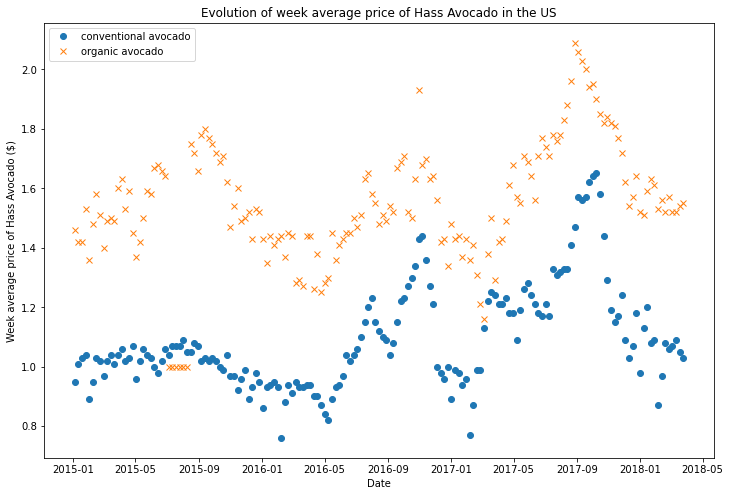

In [9]:
#Plot the week average price for conventional and organic avocado based on the total US data.
#This is done using the OOP matplotlib
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(conv_totalUS['Date'],conv_totalUS['AveragePrice'], ls='', marker='o', label='conventional avocado')
ax.plot(org_totalUS['Date'], org_totalUS['AveragePrice'],ls='',marker='x', label='organic avocado')
# Label the axes
ax.set(xlabel='Date',
       ylabel='Week average price of Hass Avocado ($)',
       title='Evolution of week average price of Hass Avocado in the US')
ax.legend()

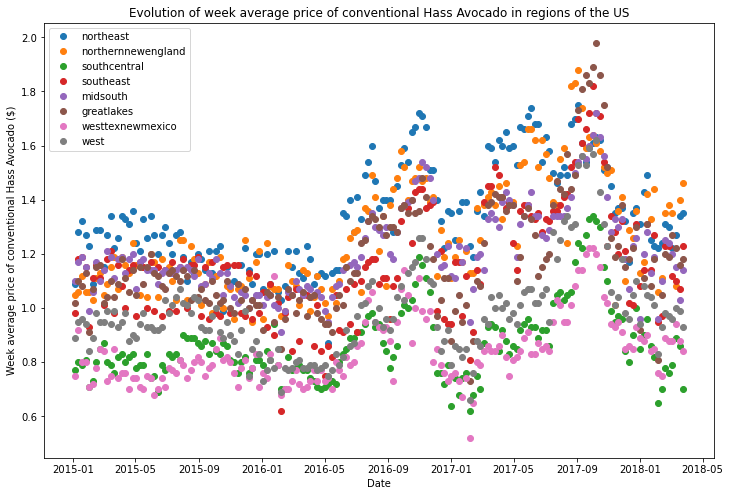

In [10]:
#Plot the week average price for conventional and organic avocado based on US regions data.
#This is done using the OOP matplotlib
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(conv_northeast['Date'],conv_northeast['AveragePrice'], ls='', marker='o', label='northeast')
ax.plot(conv_northernnewengland['Date'],conv_northernnewengland['AveragePrice'], ls='', marker='o', label='northernnewengland')
ax.plot(conv_southcentral['Date'],conv_southcentral['AveragePrice'], ls='', marker='o', label='southcentral')
ax.plot(conv_southeast['Date'],conv_southeast['AveragePrice'], ls='', marker='o', label='southeast')
ax.plot(conv_midsouth['Date'],conv_midsouth['AveragePrice'], ls='', marker='o', label='midsouth')
ax.plot(conv_greatlakes['Date'],conv_greatlakes['AveragePrice'], ls='', marker='o', label='greatlakes')
ax.plot(conv_westtexnewmexico['Date'],conv_westtexnewmexico['AveragePrice'], ls='', marker='o', label='westtexnewmexico')
ax.plot(conv_west['Date'],conv_west['AveragePrice'], ls='', marker='o', label='west')

# Label the axes
ax.set(xlabel='Date',
       ylabel='Week average price of conventional Hass Avocado ($)',
       title='Evolution of week average price of conventional Hass Avocado in regions of the US')
ax.legend()

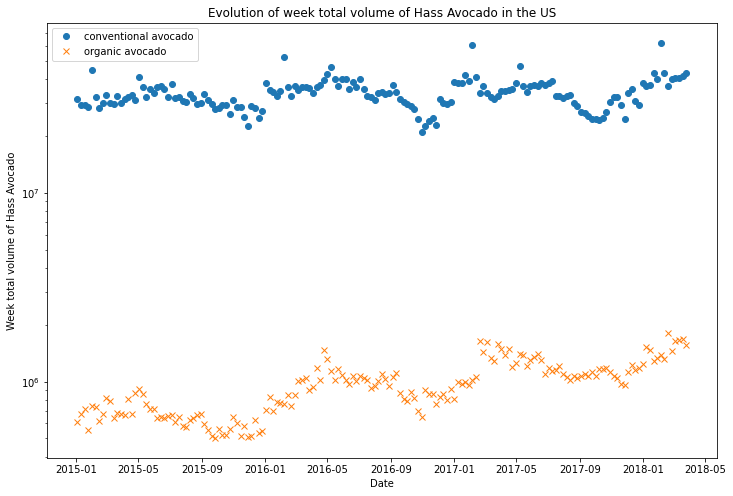

In [11]:
#Plot the week total volume for conventional and organic avocado based on the total US data.
#This is done using the OOP matplotlib
colors = sns.color_palette()
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(conv_totalUS['Date'],conv_totalUS['Total Volume'], color=colors[0], ls='', marker='o', label='conventional avocado')
ax.plot(org_totalUS['Date'],org_totalUS['Total Volume'], color=colors[1], ls='', marker='x', label='organic avocado')

ax.set_yscale('log')

ax.set(xlabel='Date', ylabel='Week total volume of Hass Avocado',
       title='Evolution of week total volume of Hass Avocado in the US')
ax.legend()

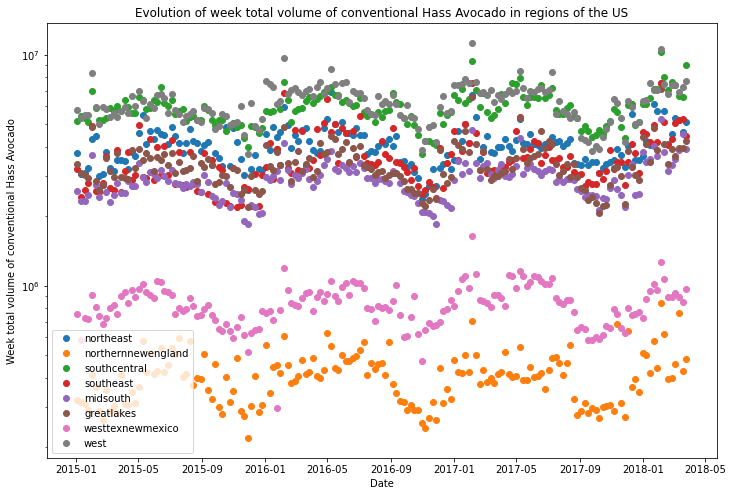

In [12]:
#Plot the week average price for conventional and organic avocado based on US regions data.
#This is done using the OOP matplotlib
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(conv_northeast['Date'],conv_northeast['Total Volume'], ls='', marker='o', label='northeast')
ax.plot(conv_northernnewengland['Date'],conv_northernnewengland['Total Volume'], ls='', marker='o', label='northernnewengland')
ax.plot(conv_southcentral['Date'],conv_southcentral['Total Volume'], ls='', marker='o', label='southcentral')
ax.plot(conv_southeast['Date'],conv_southeast['Total Volume'], ls='', marker='o', label='southeast')
ax.plot(conv_midsouth['Date'],conv_midsouth['Total Volume'], ls='', marker='o', label='midsouth')
ax.plot(conv_greatlakes['Date'],conv_greatlakes['Total Volume'], ls='', marker='o', label='greatlakes')
ax.plot(conv_westtexnewmexico['Date'],conv_westtexnewmexico['Total Volume'], ls='', marker='o', label='westtexnewmexico')
ax.plot(conv_west['Date'],conv_west['Total Volume'], ls='', marker='o', label='west')

ax.set_yscale('log')

# Label the axes
ax.set(xlabel='Date', ylabel='Week total volume of conventional Hass Avocado',
       title='Evolution of week total volume of conventional Hass Avocado in regions of the US')
ax.legend()

In [ ]:
#westtexnewmexico and norhtern have and order of magnitude smaller week total volume of conventional Hass Avocado

In [6]:
mask = df_ohc.dtypes == np.float64
float_cols = df_ohc.columns[mask]
skew_limit = 0.75
skew_vals = df_ohc[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
XLarge Bags,13.139751
4770,10.159396
Large Bags,9.796455
Total Bags,9.756072
Small Bags,9.540660
Total Volume,9.007687
4225,8.942466
4046,8.648220


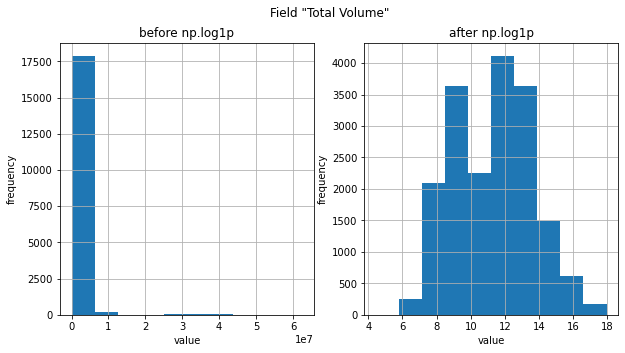

In [11]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "Total Volume"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df_ohc[field].hist(ax=ax_before)
df_ohc[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# It is better

In [7]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None
# Copy of the data
df_ohc_usk = df_ohc.copy()
for col in skew_cols.index.tolist():
    if col == "AveragePrice":
        continue
    df_ohc_usk[col] = np.log1p(df_ohc_usk[col])

In [8]:
mask = df_ohc_usk.dtypes == np.float64
float_cols = df_ohc_usk.columns[mask]
skew_limit = 0.75
skew_vals = df_ohc_usk[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
XLarge Bags,1.176494


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

pf = PolynomialFeatures(degree=2)

feature_cols = [x for x in df_ohc_usk.columns if (x !='AveragePrice' and x !='Date')]
X_usk = df_ohc_usk[feature_cols]
y_usk = df_ohc_usk['AveragePrice']

#Now we will add an order 3 polynomial fit to the linear regression
X_usk_pf = pf.fit_transform(X_usk)
X_train, X_test, y_train, y_test = train_test_split(X_usk_pf, y_usk, 
                                                    test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12774, 2211) (12774,)
(5475, 2211) (5475,)


In [10]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [11]:
#Linear regression without scaling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

linearRegression_rmse = rmse(y_test, y_pred)
print(linearRegression_rmse, r2_score(y_pred, y_test))

0.1721918709141198 0.7811624888909697


In [12]:
#Linear regression with scaling
from sklearn.preprocessing import StandardScaler

lr2 = LinearRegression()
s = StandardScaler()

X_train_s = s.fit_transform(X_train)
lr2.fit(X_train_s, y_train)

X_test_s = s.transform(X_test)
y_pred_s = lr2.predict(X_test_s)

linearRegression_rmse2 = rmse(y_test, y_pred_s)
print(linearRegression_rmse2, r2_score(y_pred_s, y_test))

0.1722648909532609 0.7811570142024387


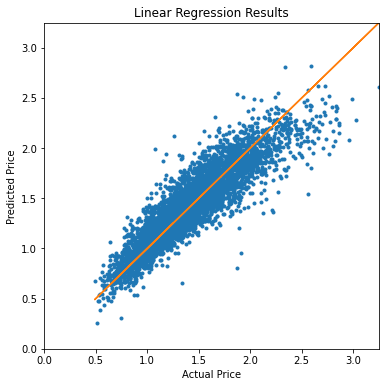

In [14]:
#We plot the actual average price against the predicted price of the test data

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_s, marker='o', ls='', ms=3.0)
ax.plot(y_test, y_test, ls='-')
lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
ylabel='Predicted Price', 
xlim=lim,
ylim=lim,
title='Linear Regression Results');

In [39]:
#Sort the linear regression coefficients by their impact on the model
pd.DataFrame(zip(X_usk.columns, elasticNetCV.coef_)).sort_values(by=1)

,0,1
1,4046,-0.124104
5,Small Bags,-0.025988
23,region_Denver,-0.006157
46,region_Plains,-0.004989
0,Total Volume,0.000000
...,...,...
18,region_Charlotte,0.016283
64,region_WestTexNewMexico,0.017050
41,region_NorthernNewEngland,0.021918
9,type_conventional,0.045124


In [15]:
#Now we will add an order 3 polynomial fit to the linear regression
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_s, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_s))

print(ridgeCV.alpha_, ridgeCV_rmse, r2_score(ridgeCV.predict(X_test_s), y_test))

0.3 0.17557051587474232 0.7672757591601138


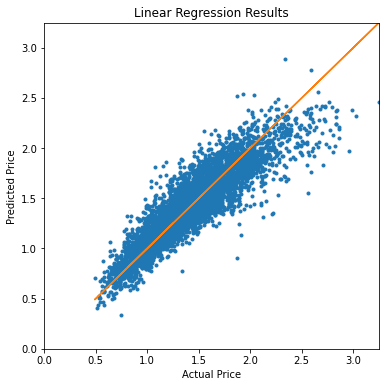

In [23]:
#We plot the actual average price against the predicted price of the test data

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test_s), marker='o', ls='', ms=3.0)
ax.plot(y_test, y_test, ls='-')
lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
ylabel='Predicted Price', 
xlim=lim,
ylim=lim,
title='Linear Regression Results');

In [16]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([0.005, 0.05, 0.1, 1, 5, 25, 50, 80,100,120,140])

lassoCV = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=4).fit(X_train_s, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test_s))

print(lassoCV.alpha_, lassoCV_rmse,r2_score(lassoCV.predict(X_test_s), y_test))  # Lasso is slower

0.005 0.23422325745654698 0.405707243776814


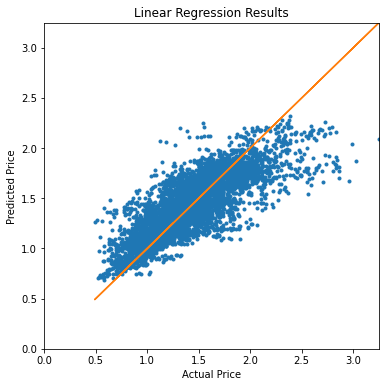

In [24]:
#We plot the actual average price against the predicted price of the test data

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test_s), marker='o', ls='', ms=3.0)
ax.plot(y_test, y_test, ls='-')
lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
ylabel='Predicted Price', 
xlim=lim,
ylim=lim,
title='Linear Regression Results');

In [20]:
#Elastic Net is slower than Lasso
from sklearn.linear_model import ElasticNetCV

l1_ratios = [.5, .7, .9, .95, .99, 1]

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=5e4).fit(X_train_s, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test_s))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.005 0.5 0.21992461961118612


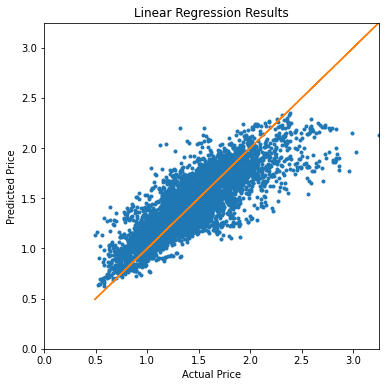

In [27]:
#We plot the actual average price against the predicted price of the test data

fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test_s), marker='o', ls='', ms=3.0)
ax.plot(y_test, y_test, ls='-')
lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
ylabel='Predicted Price', 
xlim=lim,
ylim=lim,
title='Linear Regression Results');

In [21]:
rmse_vals = [linearRegression_rmse2, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.172265
Ridge,0.175571
Lasso,0.234223
ElasticNet,0.219925


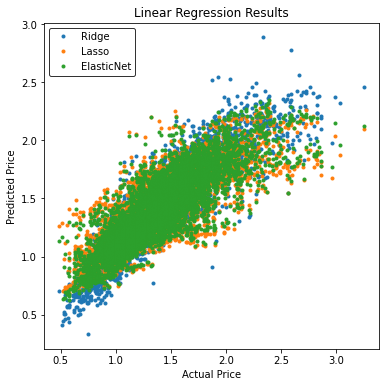

In [22]:
fig, ax = plt.subplots(figsize=(6,6))

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test_s), 
             marker='o', ls='', ms=3.0, label=lab)

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');